In [32]:
import numpy as np
import pandas as pd
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import NearestNeighbors

In [2]:
df=pd.read_csv('spotify.xls',index_col=[0])
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [3]:
df.shape

(1000, 5000)

In [4]:
x=df.values

In [5]:
x

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

In [6]:
nmf=NMF(n_components=100,max_iter=1000,random_state=100)

In [7]:
nmf.fit(x)

C:\Users\vikasmishra\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
C:\Users\vikasmishra\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


NMF(max_iter=1000, n_components=100, random_state=100)

In [8]:
user_maatix=nmf.transform(x)

In [9]:
user_maatix.shape

(1000, 100)

In [10]:
user_maatix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.84533542, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.63945089, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.33751685, 0.        , ..., 3.14601071, 0.        ,
        0.        ],
       [0.        , 1.12147873, 0.        , ..., 0.        , 0.40783907,
        1.47084396],
       [0.72454542, 1.81791399, 0.13795083, ..., 0.52178048, 0.        ,
        0.        ]])

In [11]:
song_matrix=nmf.components_.T

In [12]:
song_matrix.shape

(5000, 100)

In [13]:
song_matrix

array([[0.13281758, 0.1474877 , 0.        , ..., 0.22845059, 0.19561522,
        0.23372763],
       [0.22575796, 0.        , 0.48204324, ..., 0.16088125, 0.06590065,
        0.08401945],
       [0.2610321 , 0.        , 0.02409176, ..., 0.65954439, 0.23477369,
        0.16624549],
       ...,
       [0.26699177, 0.23706928, 0.14580404, ..., 0.10532991, 0.4363255 ,
        0.31363757],
       [0.        , 0.24150991, 0.17487193, ..., 0.34798278, 0.06774254,
        0.        ],
       [0.13206822, 0.        , 0.01791898, ..., 0.27922375, 0.16782685,
        0.30997385]])

# Steps in building the recommendation system

In [14]:
# Step 1: Consider recommending songs to user no 1(Located in row location 0)
# Step 2: Find the ecludian distance b/w user no 1 and the other 999 users.
# Step 3: Find out the top 10 songs heard by the 5 closest users.
# Step 4: Recommend these songs to user no 1

In [15]:
# Step 1
def calculate_distance(u1,u2):
    return pow(sum([pow(u1[x]-u2[x],2) for x in range(len(u1))]),0.5)

In [16]:
calculate_distance(user_maatix[0],user_maatix[1])

12.962015431674537

In [17]:
# Step 2:
def distance_from_base_user(base_user,user_maatix):
    distance=[]
    for i in range(len(user_maatix)):
        if base_user!=i:
            distance.append(calculate_distance(user_maatix[base_user],user_maatix[i]))
        else:
            pass
    return distance

In [18]:
dist1=distance_from_base_user(0,user_maatix)

In [19]:
len(dist1)

999

### Finding out top 5 closest users to the user 1

In [20]:
# Step 3
user_index=np.argsort(dist1)[0:5]

In [21]:
user_index

array([890, 227, 483, 325, 308], dtype=int64)

In [22]:
for i in user_index:
    print('Songs heard by user',i)
    temp=pd.DataFrame(df.iloc[i])
    print(temp[temp.values!=0].index)

Songs heard by user 890
Index(['song_1', 'song_2', 'song_3', 'song_6', 'song_7', 'song_8', 'song_10',
       'song_11', 'song_12', 'song_13',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4705)
Songs heard by user 227
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4703)
Songs heard by user 483
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4990', 'song_4991', 'song_4992', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4689)
Songs 

In [23]:
# Finding out top 10 songs 

In [24]:
def top10_songs(user_index,df):
    temp_df=df.iloc[user_index]
#     print(temp_df.max())
    dict=temp_df.max().to_dict()
    sort_dict=sorted(dict.items(),key=lambda keyvalue: (keyvalue[1],keyvalue[0]),reverse=True)[0:10]
    return [x[0] for x in sort_dict]

In [25]:
top10_songs(user_index,df)

['song_997',
 'song_992',
 'song_991',
 'song_99',
 'song_987',
 'song_981',
 'song_979',
 'song_978',
 'song_974',
 'song_971']

### Method 2 : By using K-Means Clustering

In [26]:
from sklearn.cluster import KMeans

In [27]:
wcss={}
for k in range(1,50):
    kmeans=KMeans(n_clusters=k,max_iter=1000).fit(song_matrix)
    wcss[k]=kmeans.inertia_

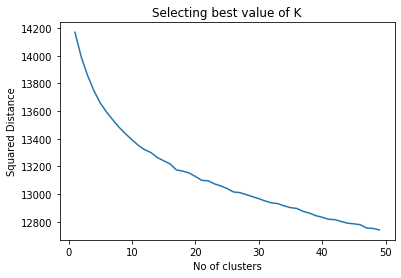

In [28]:
plt.figure()
plt.plot(list(wcss.keys()),list(wcss.values()))
plt.xlabel('No of clusters')
plt.ylabel('Squared Distance')
plt.title('Selecting best value of K')
plt.show()

### From Above we have got the best value of K to prepare the cluster which is K=12
    So lets develop a recommendation system to get the suggestion for similar kind of songs

In [53]:
def fav_song_recommendation(data,no_of_clusters,song_matrix,song_name,n_recommendation):
    kmeans=KMeans(n_clusters=no_of_clusters,max_iter=1000).fit(song_matrix) #makes cluster of the songs
    index_in_songs=data.columns.to_list().index(song_name) #gets the index of the base song from the main database
    song_vector=song_matrix[index_in_songs] #it takes the values of the base song from the decompose song matrix
    allsongs_in_cluster=list(kmeans.predict(song_matrix)) # Prepares clusters for all the song in the song matrix
    songs_in_cluster_of_basesong=[x for x in range(len(allsongs_in_cluster)) if allsongs_in_cluster[x]==kmeans.predict([song_vector])]##checking the song which are alike a base song
    song_cluster=song_matrix[songs_in_cluster_of_basesong]
    KNN=NearestNeighbors(n_neighbors=n_recommendation)
    KNN.fit(song_cluster)
    recommended_songs=KNN.kneighbors([song_matrix[index_in_songs]])
    col_list=list(df.columns)
#     print(recommended_songs)
#     print(index_in_songs)
    return [col_list[x] for x in recommended_songs[1][0]]

In [54]:
fav_song_recommendation(df,12,song_matrix,"song_50",5)
# We have got a recommendation f 5 songs for song name : song_2

['song_6', 'song_222', 'song_267', 'song_438', 'song_461']